In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [2]:
sales = pd.read_pickle("../Data/sales_day.pkl")
sales.head()


,date,total_amount
0,2009-12-01,37366.32
1,2009-12-02,45644.67
2,2009-12-03,66327.53
3,2009-12-04,31448.44
4,2009-12-05,9042.36


In [3]:
len(sales)

604

In [4]:
sales_train = pd.DataFrame(sales.iloc[:int(sales.shape[0]*0.8)])
sales_test = pd.DataFrame(sales.iloc[int(sales.shape[0]*0.8):])

In [5]:
print(sales_train.head())

         date  total_amount
0  2009-12-01      37366.32
1  2009-12-02      45644.67
2  2009-12-03      66327.53
3  2009-12-04      31448.44
4  2009-12-05       9042.36


In [6]:
print(sales_test.head())

           date  total_amount
483  2011-07-21     26473.990
484  2011-07-22     12975.680
485  2011-07-24     25092.430
486  2011-07-25     15965.500
487  2011-07-26     16036.591


In [7]:
fig = px.line(sales_train, x="date", y="total_amount", title="Sales by day")
fig.show()

In [8]:
len(sales_train)

483

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



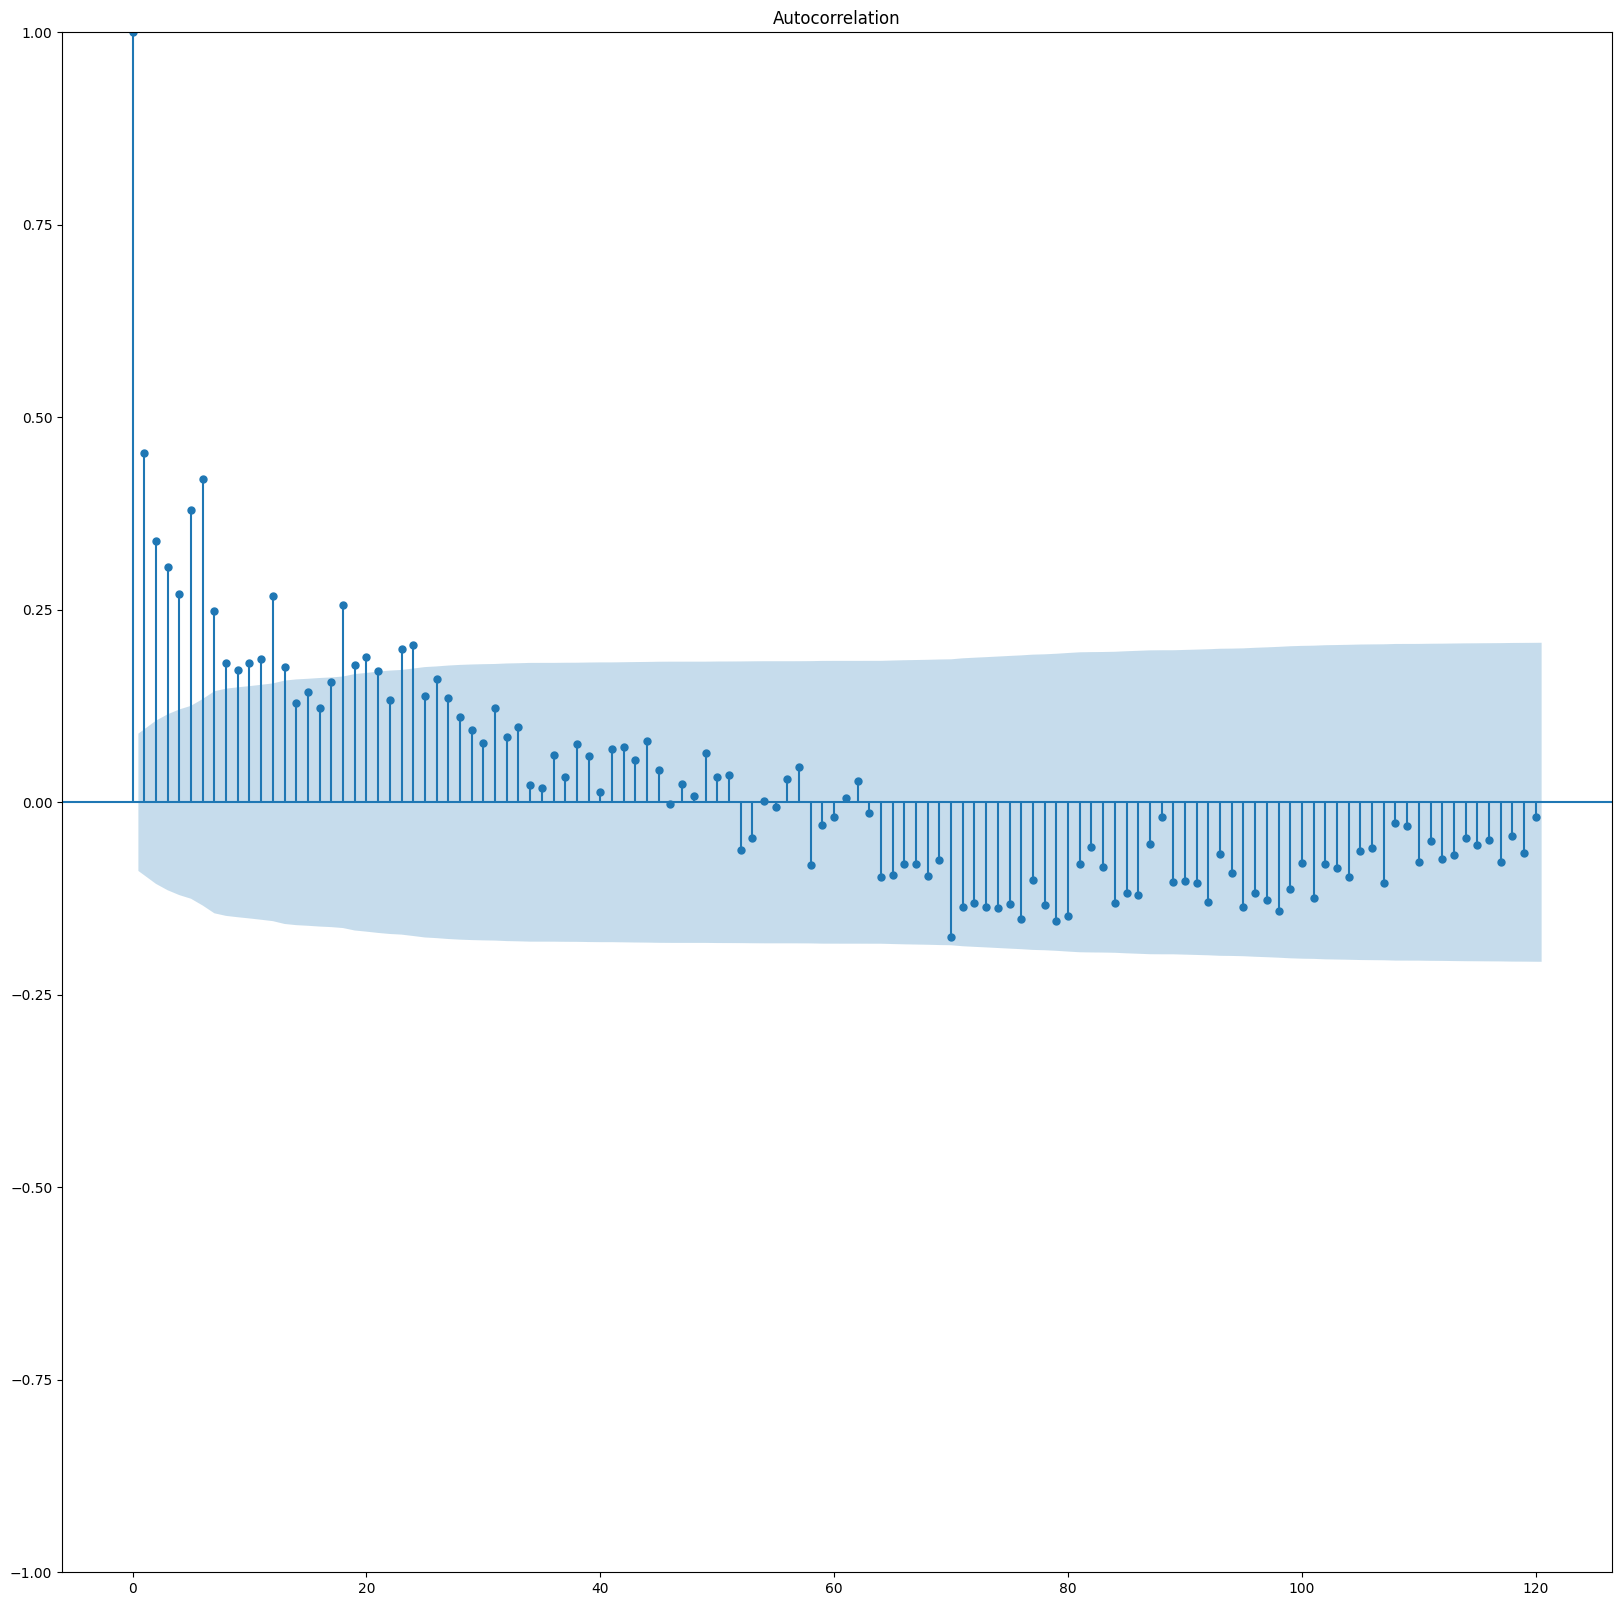

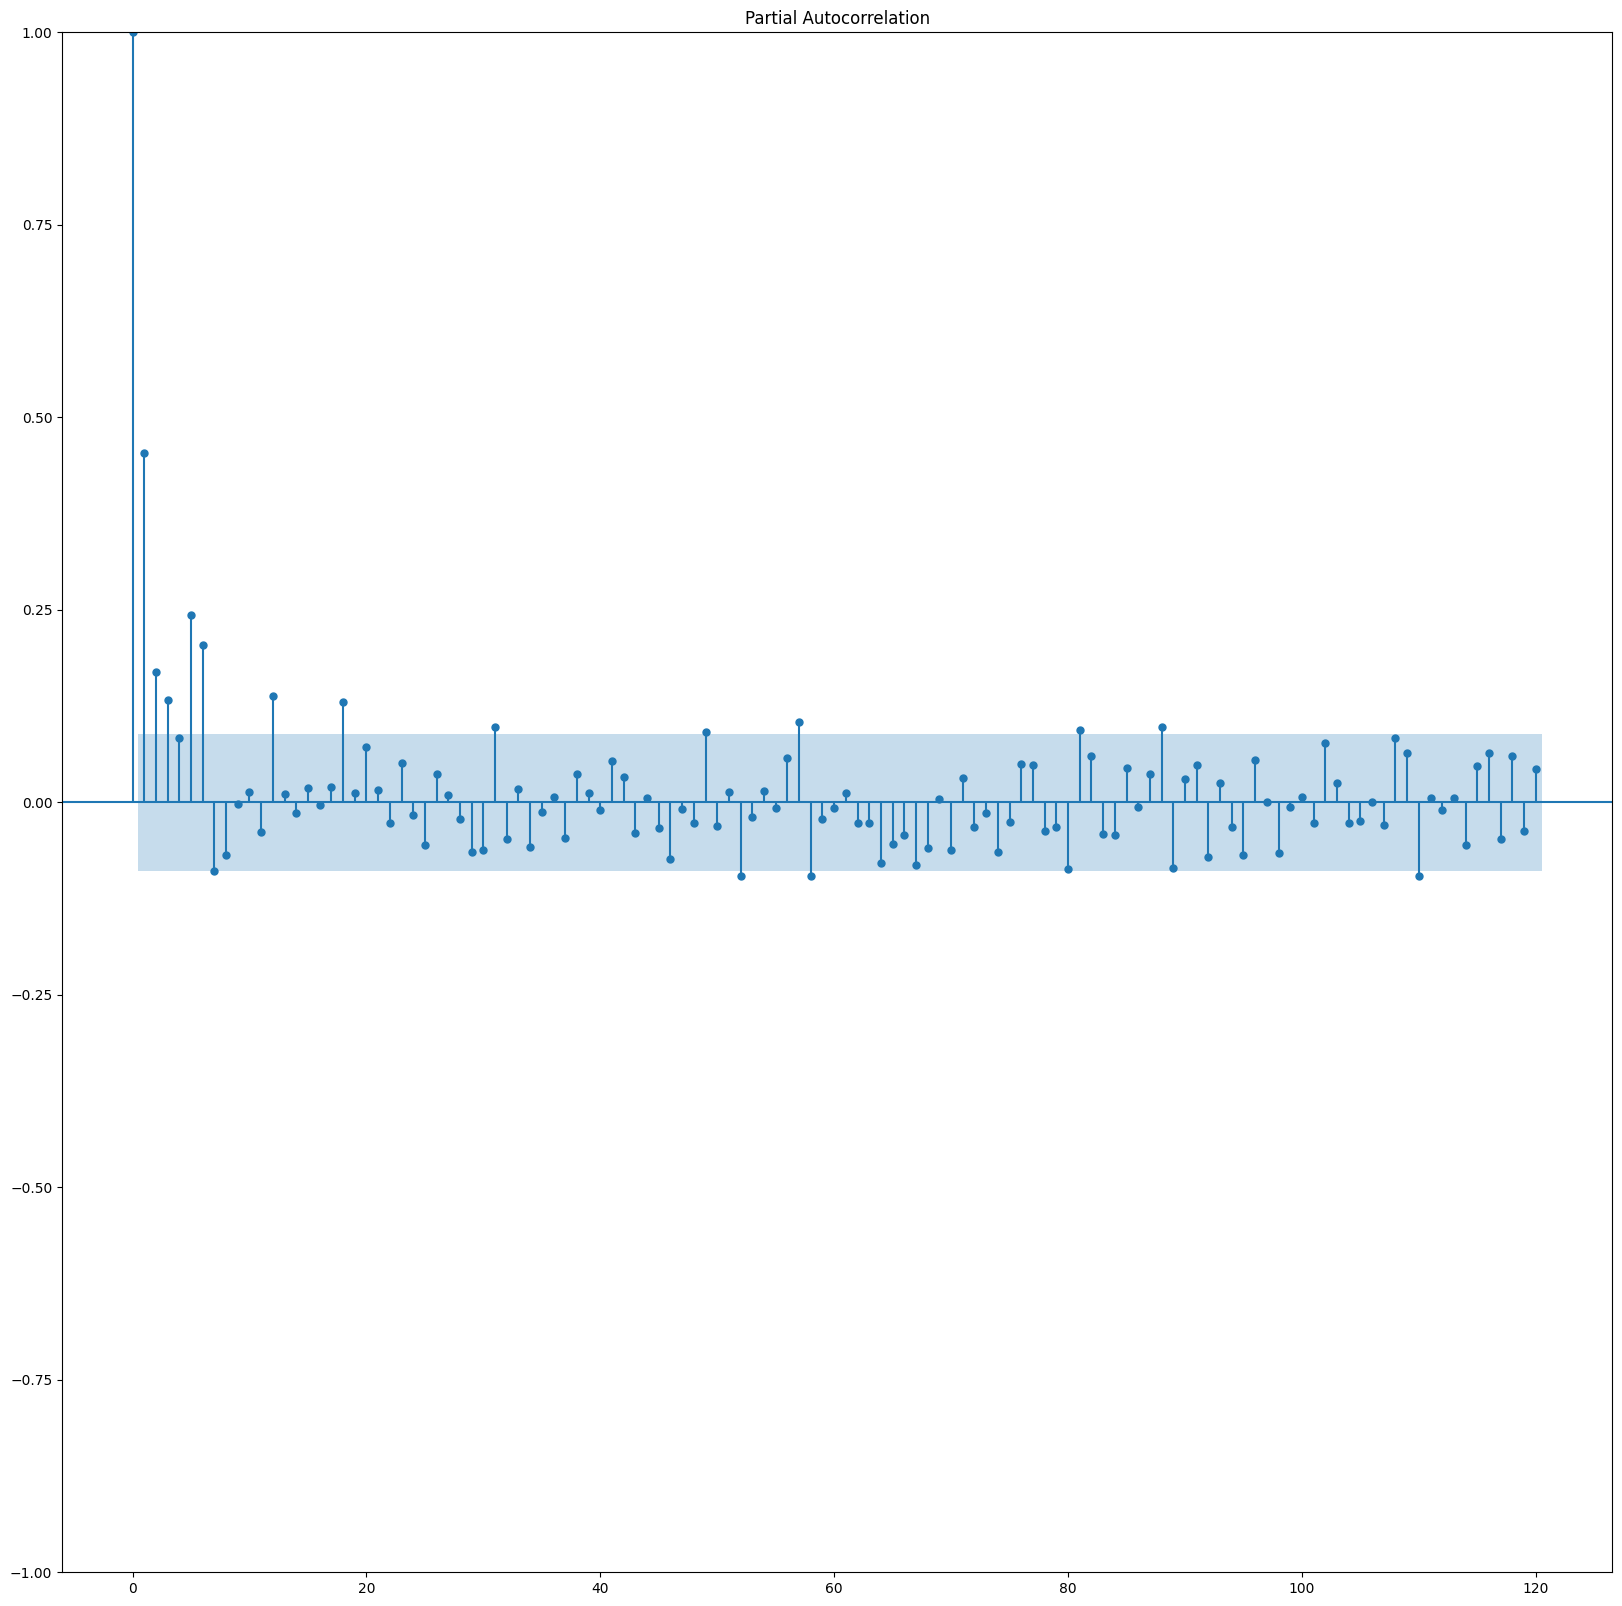

In [9]:
plt.rc("figure", figsize=(20,20))
plot_acf(sales_train["total_amount"], lags=int(len(sales_train)/4))
plot_pacf(sales_train["total_amount"], lags=int(len(sales_train)/4))
plt.show()


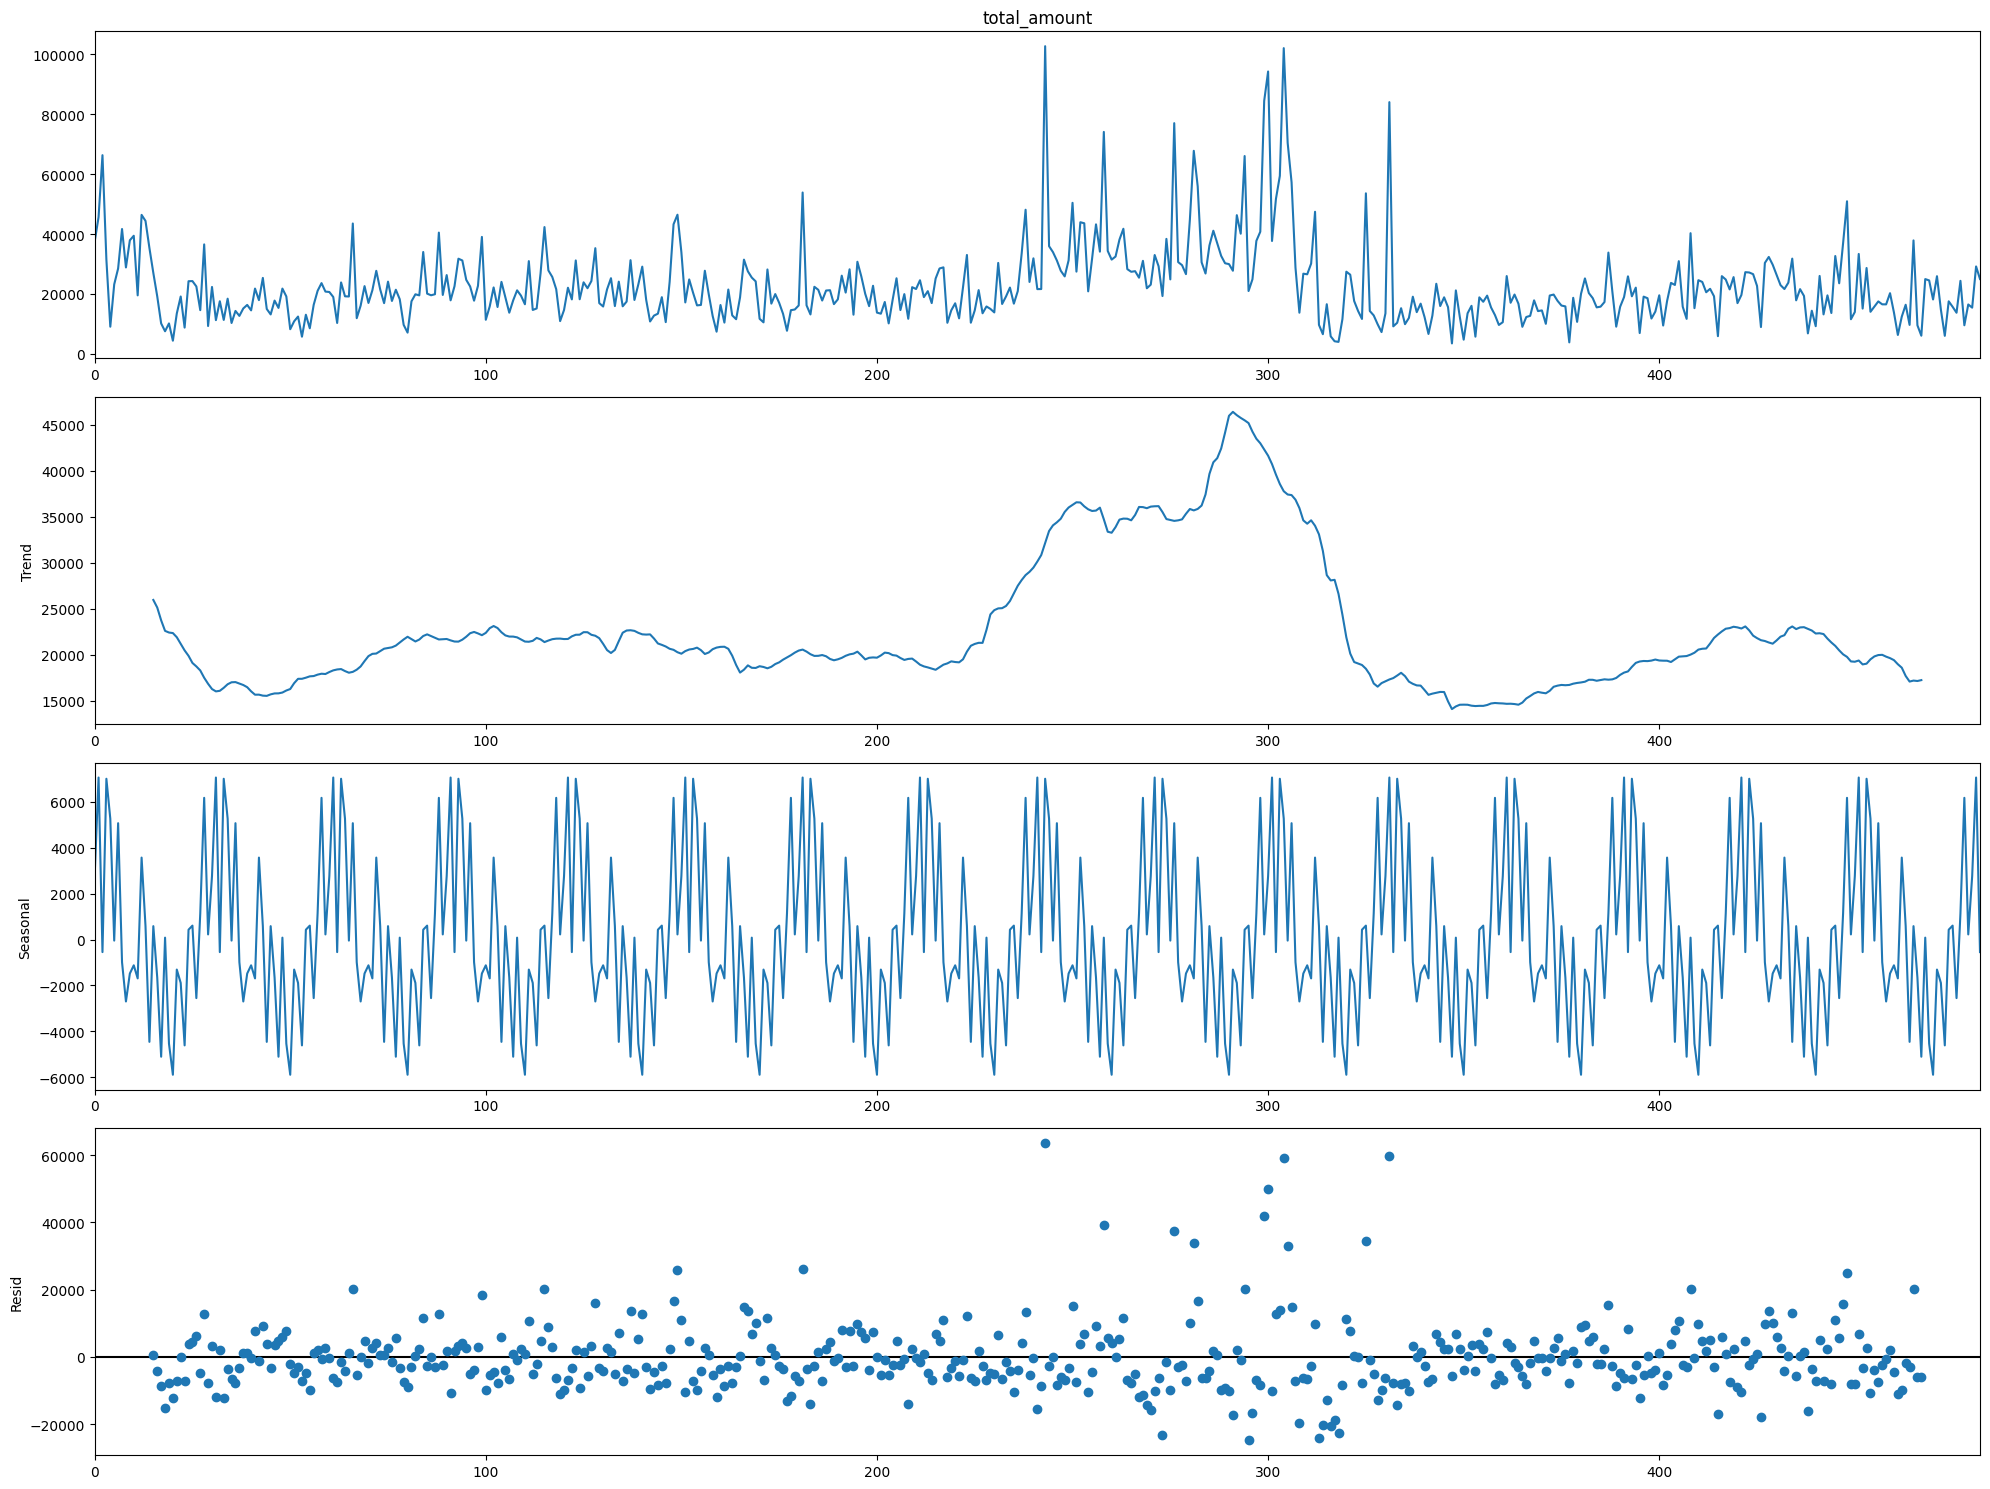

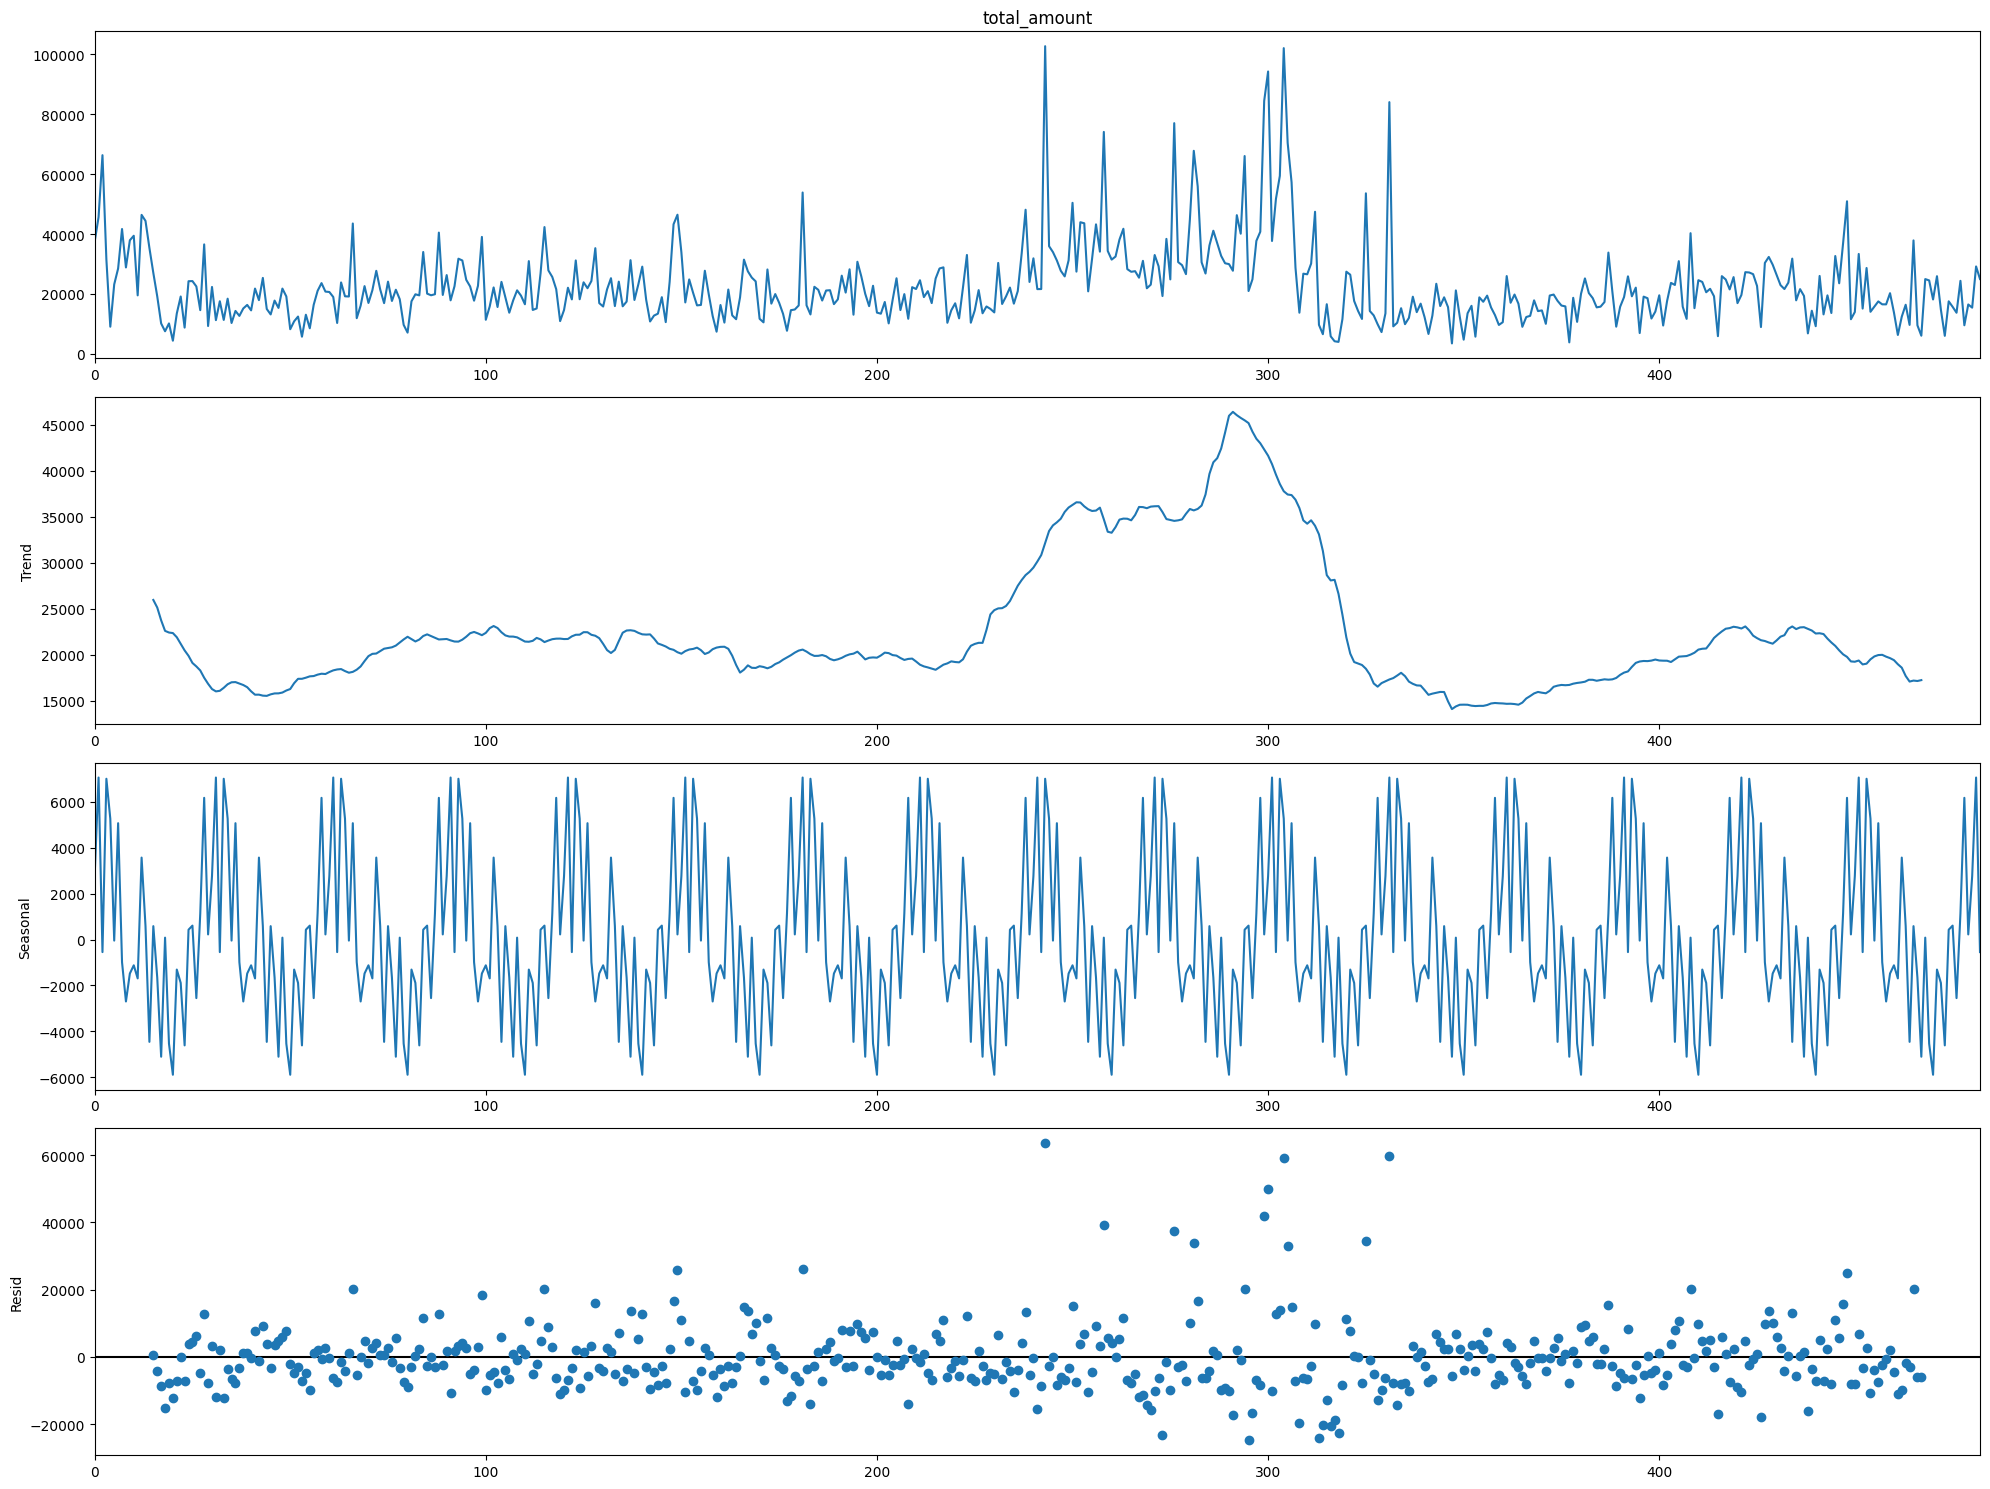

In [10]:
plt.rc("figure", figsize=(20,15))
decomposition = seasonal_decompose(sales_train['total_amount'], 
                                   model='add',
                                   period=30)
decomposition.plot()


## Single Exponential Smoothing

In [11]:
m = 300
alpha = 1 / (2 * m)
sales_train['HWES1'] = SimpleExpSmoothing(sales_train["total_amount"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
sales['HWES1'] = SimpleExpSmoothing(sales["total_amount"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues

<AxesSubplot: title={'center': 'Holt Winters Single Exponential Smoothing'}>

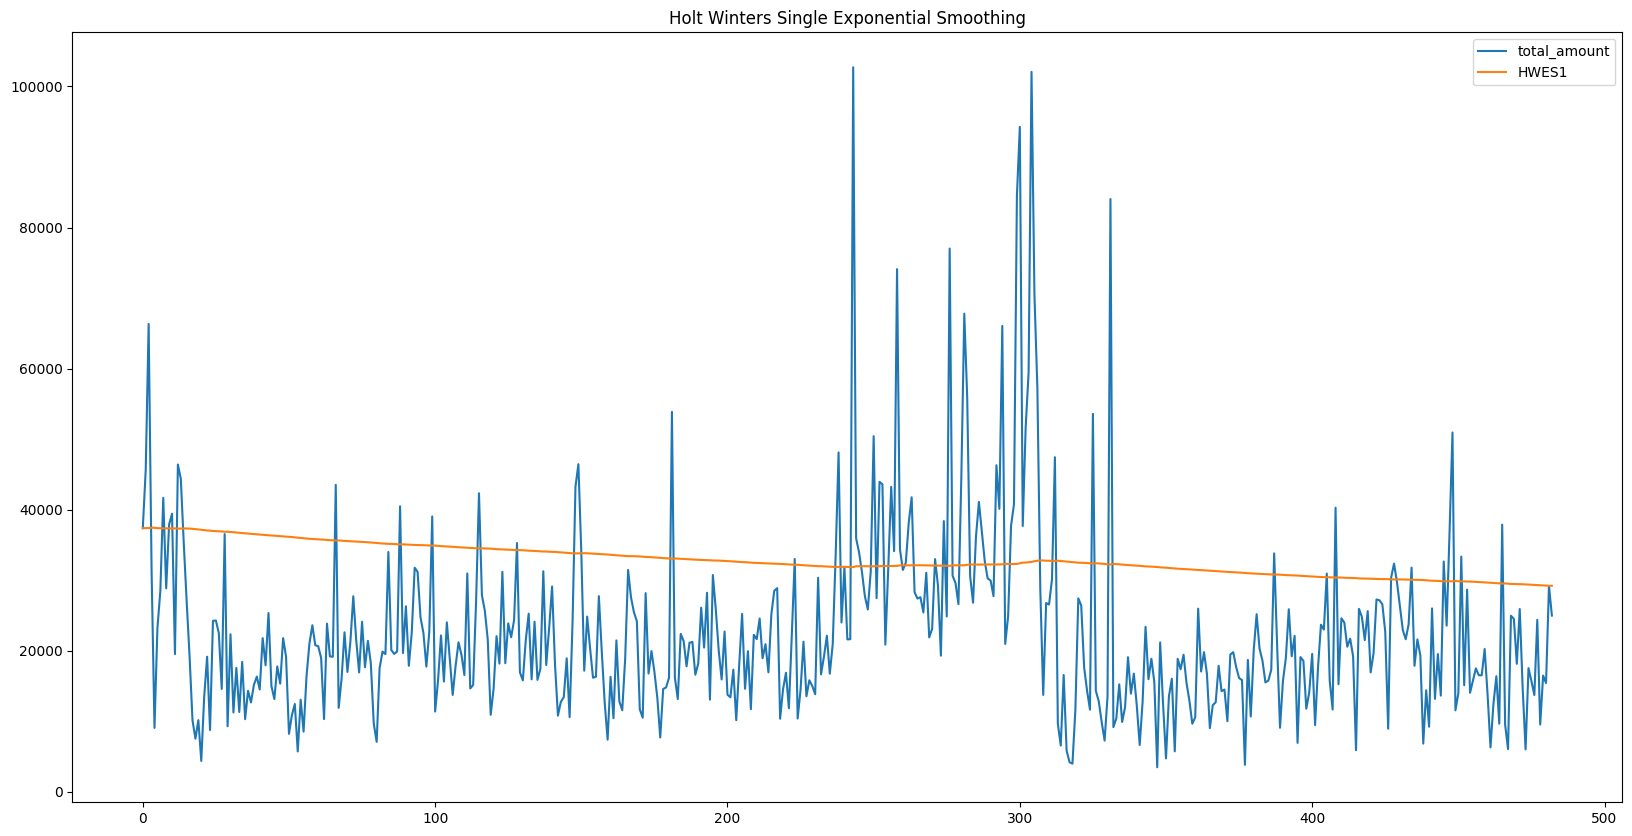

In [12]:
sales_train[['total_amount','HWES1']].plot(figsize=(20,10), title='Holt Winters Single Exponential Smoothing')

## Double HWES

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<AxesSubplot: title={'center': 'Holt Winters Double Exponential Smoothing'}>

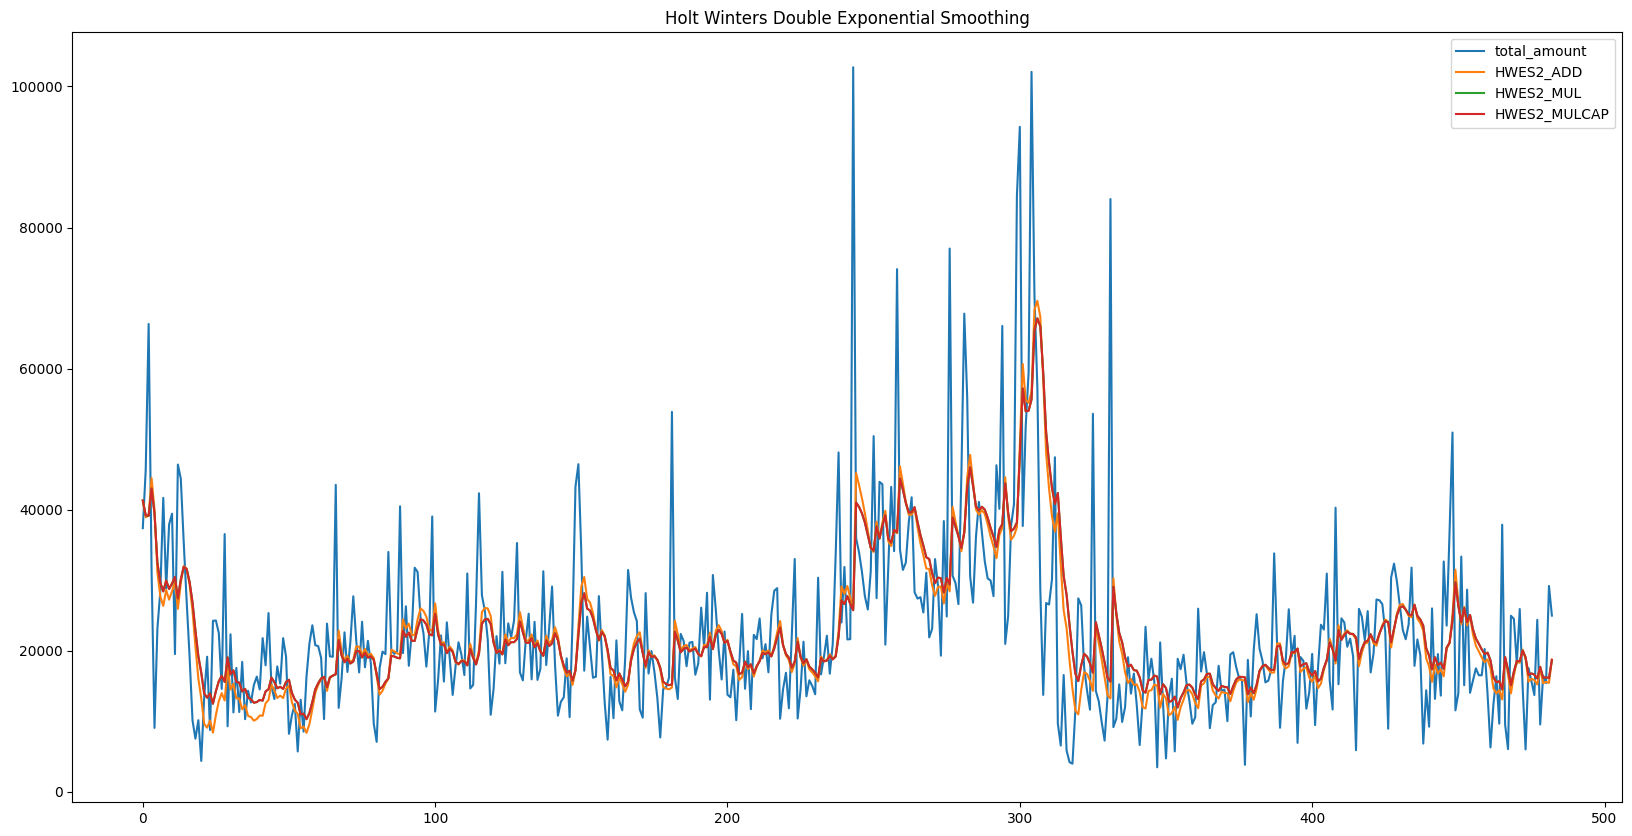

In [13]:

sales_train['HWES2_ADD'] = ExponentialSmoothing(sales_train['total_amount'],trend='add').fit().fittedvalues
sales['HWE2_ADD'] = ExponentialSmoothing(sales['total_amount'],trend='add').fit().fittedvalues
sales_train['HWES2_MUL'] = ExponentialSmoothing(sales_train['total_amount'],trend='mul').fit().fittedvalues
sales['HWE2_MUL'] = ExponentialSmoothing(sales['total_amount'],trend='mul').fit().fittedvalues
sales_train['HWES2_MULCAP'] = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative').fit().fittedvalues
sales['HWE2_MULCAP'] = ExponentialSmoothing(sales['total_amount'],trend='multiplicative').fit().fittedvalues
sales_train[['total_amount','HWES2_ADD','HWES2_MUL','HWES2_MULCAP']].plot(figsize=(20,10), title='Holt Winters Double Exponential Smoothing')


## Triple HWES

In [16]:
sales_train["HWES3_ADD"] = ExponentialSmoothing(sales_train['total_amount'],trend='add',seasonal='add',seasonal_periods=180).fit().fittedvalues
sales['HWE3_ADD'] = ExponentialSmoothing(sales['total_amount'],trend='add',seasonal='add',seasonal_periods=180).fit().fittedvalues
sales_train['HWES3_MUL'] = ExponentialSmoothing(sales_train['total_amount'],trend='mul',seasonal='mul',seasonal_periods=180).fit().fittedvalues
sales['HWE3_MUL'] = ExponentialSmoothing(sales['total_amount'],trend='mul',seasonal='mul',seasonal_periods=180).fit().fittedvalues
sales_train['HWES3_MULCAP'] = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=180).fit().fittedvalues
sales['HWE3_MULCAP'] = ExponentialSmoothing(sales['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=180).fit().fittedvalues
sales_train.head()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,date,total_amount,HWES1,HWES2_ADD,HWES2_MUL,HWES2_MULCAP,HWES3_ADD,HWES3_MUL,HWES3_MULCAP
0,2009-12-01,37366.32,37366.320000,41286.550545,41286.550545,41286.550545,14035.088222,14569.511904,14569.511904
1,2009-12-02,45644.67,37366.320000,38921.725466,39191.188031,39191.188031,55935.565800,59466.261542,59466.261542
2,2009-12-03,66327.53,37380.117250,39155.964678,39120.164127,39120.164127,16317.271860,17158.824775,17158.824775
3,2009-12-04,31448.44,37428.362938,44462.423035,42999.828853,42999.828853,22365.431398,19731.731108,19731.731108
4,2009-12-05,9042.36,37418.396400,40023.829253,39468.024191,39468.024191,33246.785701,36438.021376,36438.021376


<AxesSubplot: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

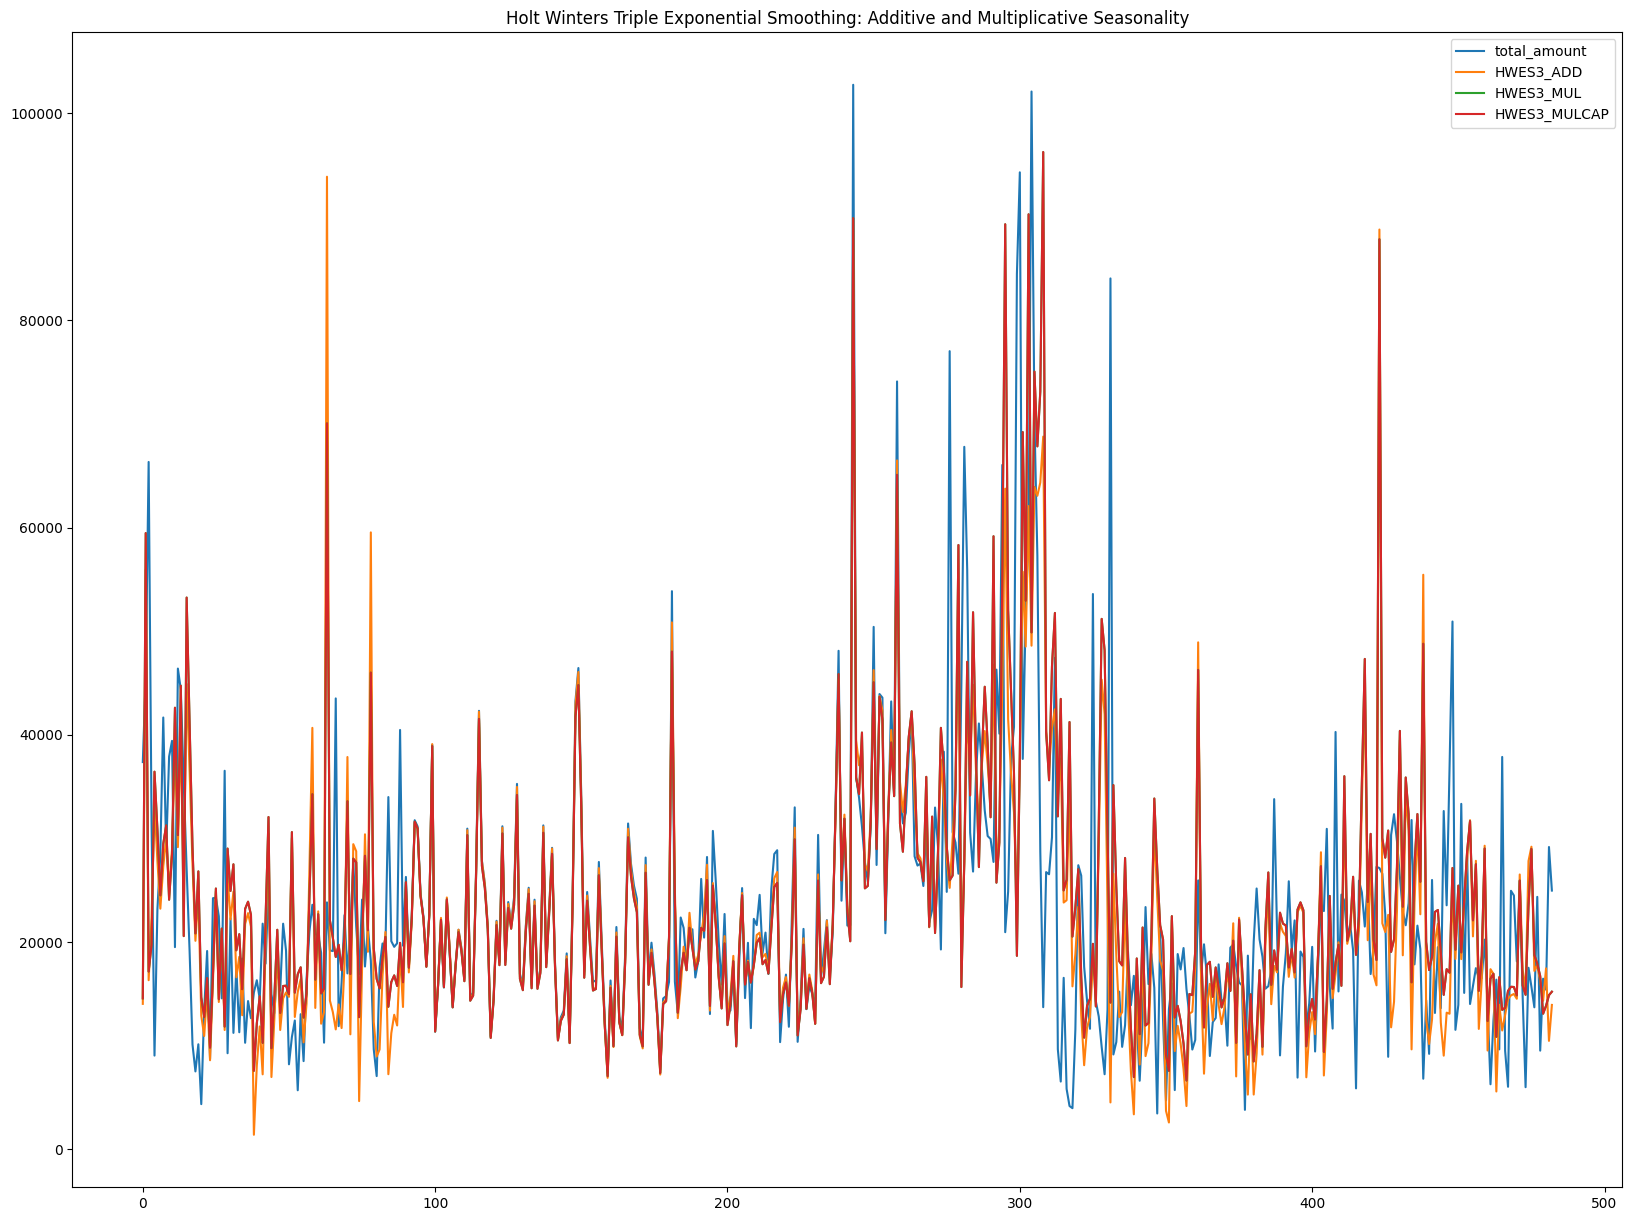

In [17]:
sales_train[['total_amount','HWES3_ADD','HWES3_MUL','HWES3_MULCAP']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

## Forecasting

In [18]:
len(sales_test)

121

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

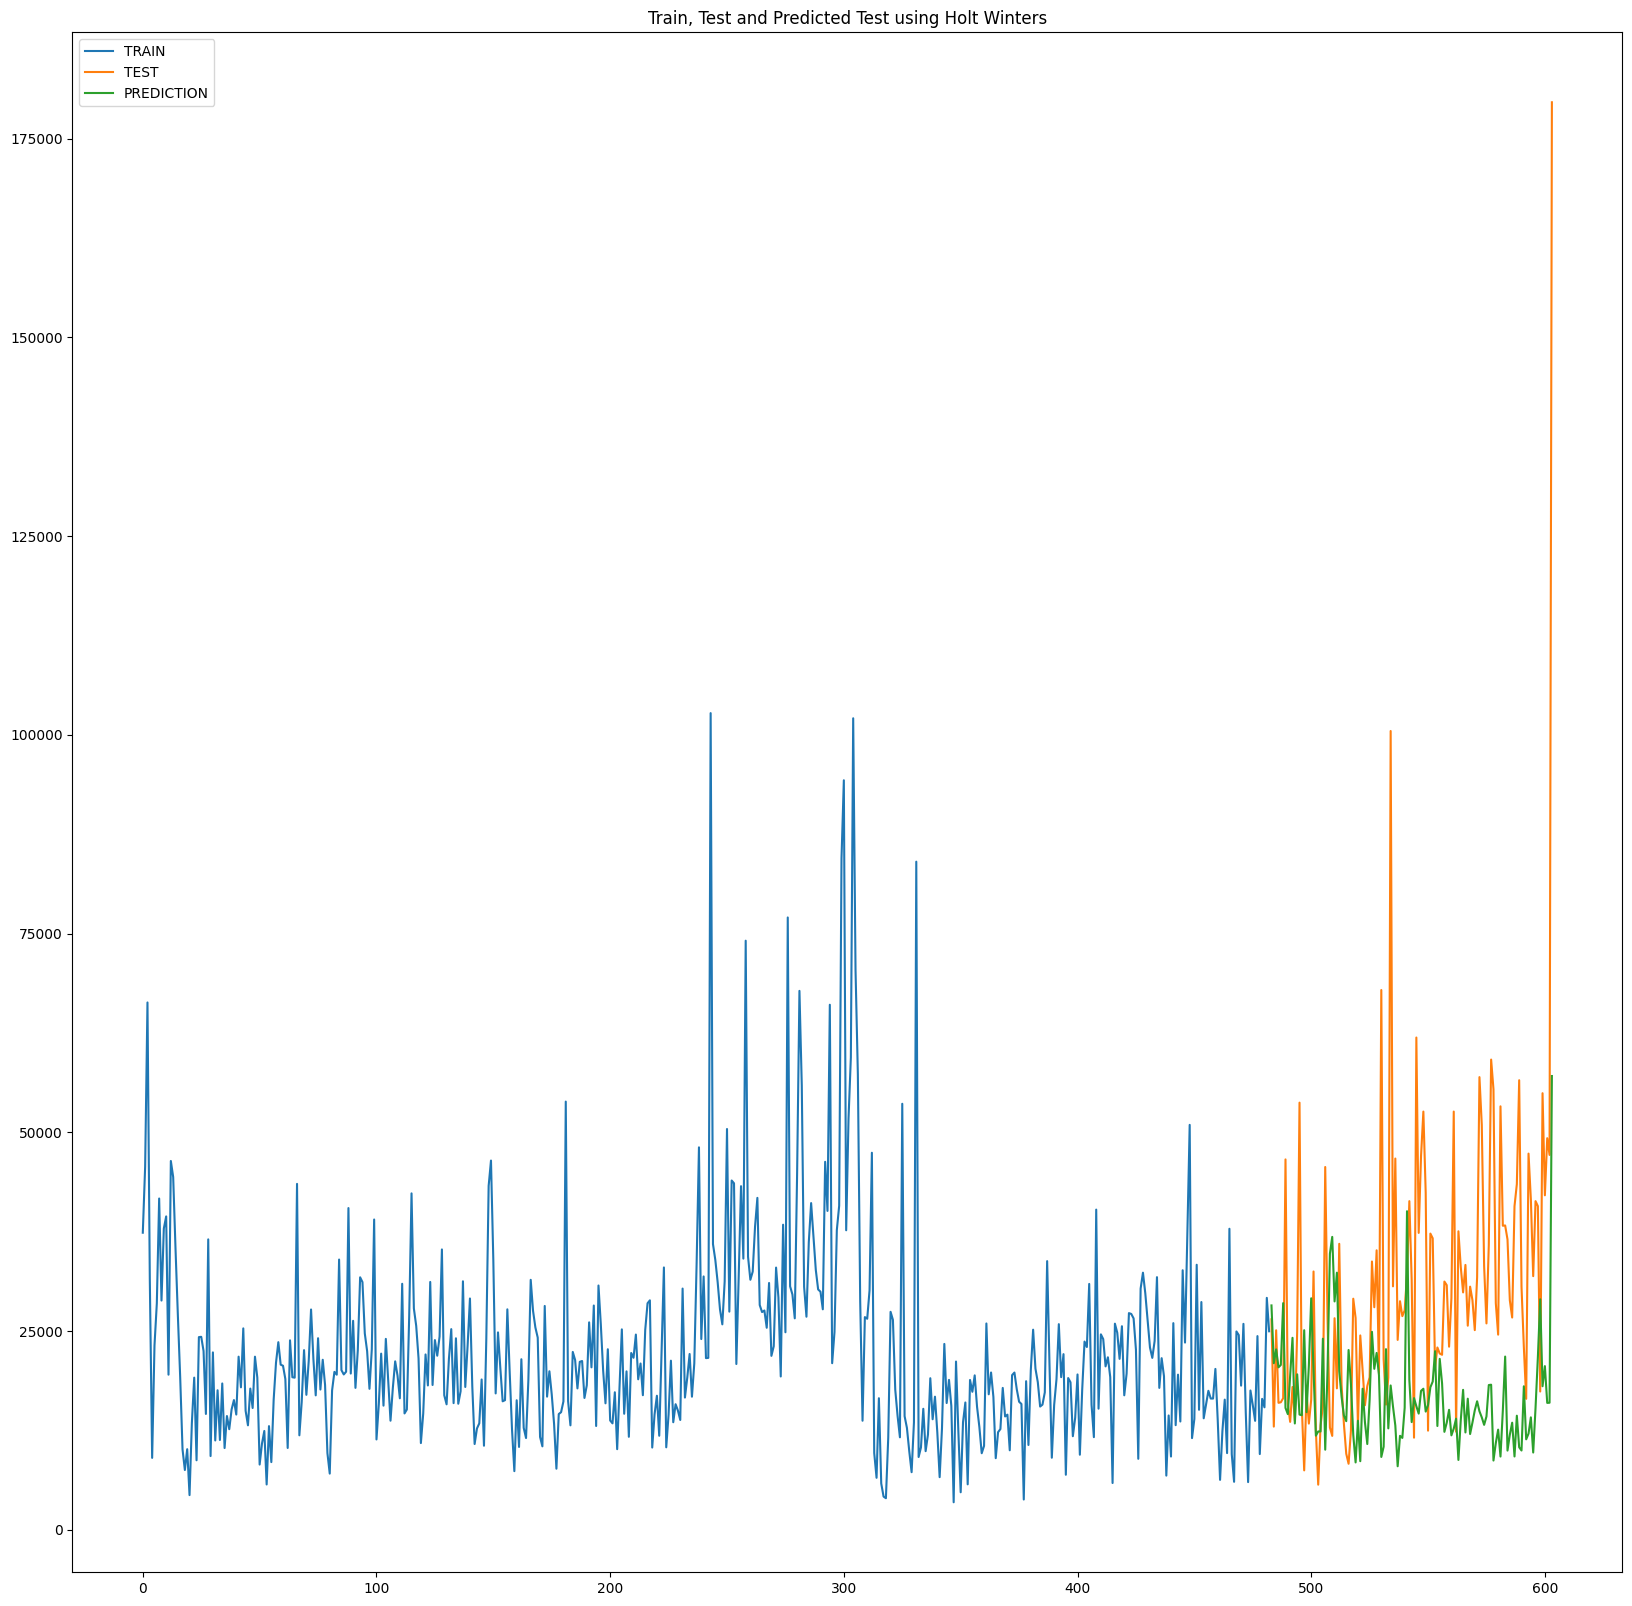

In [19]:
fitted_model = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=180,damped_trend=True).fit()
test_predictions = fitted_model.forecast(len(sales_test))
sales_train['total_amount'].plot(legend=True,label='TRAIN')
sales_test['total_amount'].plot(legend=True,label='TEST',figsize=(20,20))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

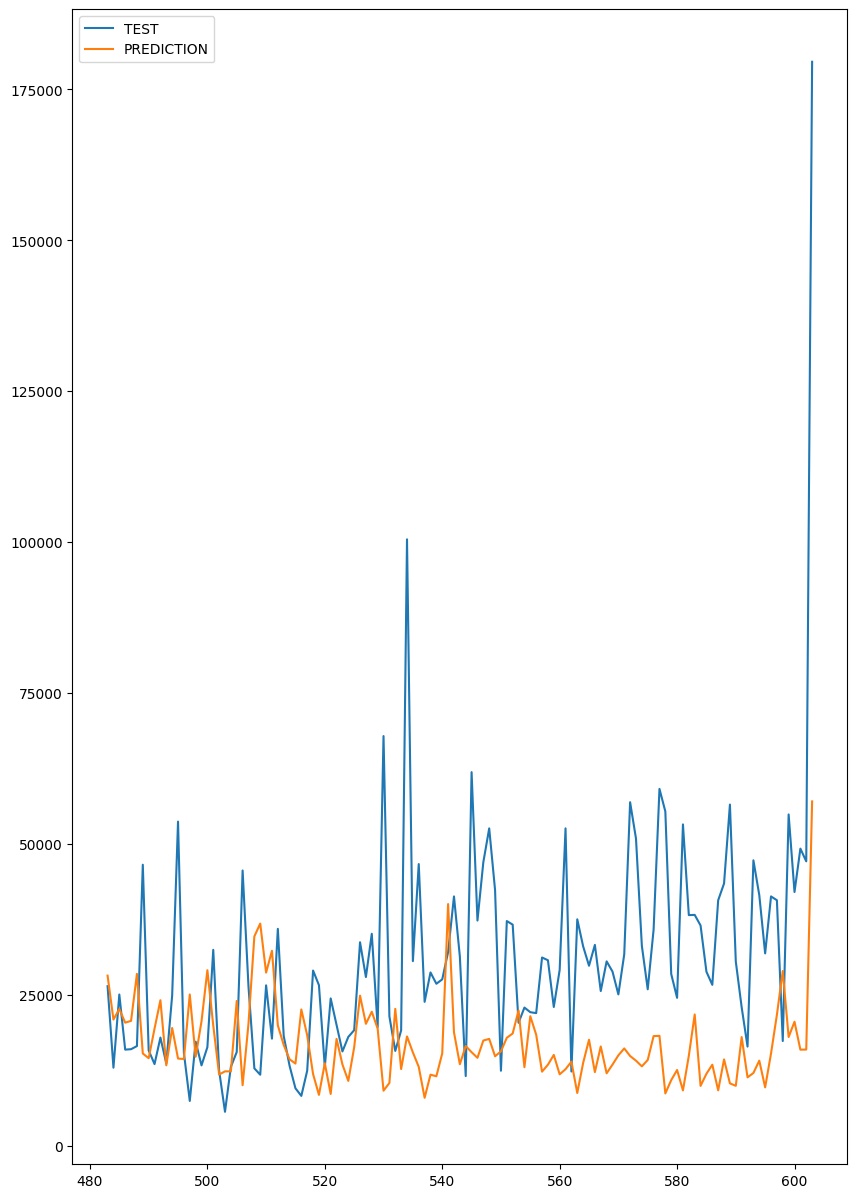

In [20]:
sales_test['total_amount'].plot(legend=True,label='TEST',figsize=(10,15))
test_predictions.plot(legend=True,label='PREDICTION');

In [21]:
print("MAPE: ", mean_absolute_percentage_error(sales_test['total_amount'], test_predictions))

MAPE:  0.5329191504366155


In [22]:
print("MAPE: ", mean_absolute_percentage_error(sales_train['total_amount'], sales_train['HWES3_MULCAP']))

MAPE:  0.45373061996953584


In [23]:
print("MAPE: ", mean_absolute_percentage_error(sales['total_amount'], sales['HWE3_MULCAP']))

MAPE:  0.385535889544503


In [24]:
def holt_winters_fit(train,periods,step):
    fitted_model = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',seasonal_periods=periods).fit()
    predict = fitted_model.forecast(step)
    return predict

In [25]:
sales = pd.read_pickle("../Data/sales_day.pkl")

In [26]:
X = sales.drop(['total_amount'], axis=1)
y = sales['total_amount']
mape = []
tss = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pred = holt_winters_fit(y_train,int(len(y_train)/4),len(y_test))
    mape.append(mean_absolute_percentage_error(y_test, pred))

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [27]:
print("Average MAPE: ", np.mean(mape))

Average MAPE:  0.7982713511495547


In [28]:
mape

[0.6060273414338959,
 0.7138887290320262,
 1.6826023117563553,
 0.462989024524414,
 0.5258493490010826]